In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import xgboost 
from xgboost import XGBRegressor

### Lendo a base de dados


In [201]:
dados = pd.read_excel('CCARDBALANCE.xlsx')
dados = dados.drop('ID',axis = 1)
display(dados)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


### Corrigindo os valores de string para numeric

In [192]:
dados['Estudante'] = dados['Estudante'].replace({'Yes': 1, 'No': 0})
dados['Casado'] = dados['Casado'].replace({'Yes': 1, 'No': 0})
dados['Etnia'] = dados['Etnia'].replace({'Caucasian': 0, 'Asian': 1,'African American' : 2})
dados['Sexo'] = dados['Sexo'].replace({' Male':1,'Female':0})

In [212]:
display(dados)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,14.891,3606,283,2,34,11,1,0,1,0,333
1,106.025,6645,483,3,82,15,0,1,1,1,903
2,104.593,7075,514,4,71,11,1,0,0,1,580
3,148.924,9504,681,3,36,11,0,0,0,1,964
4,55.882,4897,357,2,68,16,1,0,1,0,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,0,560
396,13.364,3838,296,5,65,17,1,0,0,2,480
397,57.872,4171,321,5,67,12,0,0,1,0,138
398,37.728,2525,192,1,44,13,1,0,1,0,0


In [213]:
dados_classificacao = pd.read_excel('CCARDBALANCE.xlsx')
dados_classificacao.loc[dados['Gasto Mensal'] > 0, 'Gasto Mensal'] = 'Gastou'
dados_classificacao.loc[dados['Gasto Mensal'] == 0, 'Gasto Mensal'] = 'Não Gastou'
dados_classificacao['Estudante'] = dados['Estudante'].replace({'Yes': 1, 'No': 0})
dados_classificacao['Casado'] = dados['Casado'].replace({'Yes': 1, 'No': 0})
dados_classificacao['Etnia'] = dados['Etnia'].replace({'Caucasian': 0, 'Asian': 1,'African American' : 2})
dados_classificacao['Sexo'] = dados['Sexo'].replace({' Male':1,'Female':0})
display(dados_classificacao)

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,1,14.891,3606,283,2,34,11,1,0,1,0,Gastou
1,2,106.025,6645,483,3,82,15,0,1,1,1,Gastou
2,3,104.593,7075,514,4,71,11,1,0,0,1,Gastou
3,4,148.924,9504,681,3,36,11,0,0,0,1,Gastou
4,5,55.882,4897,357,2,68,16,1,0,1,0,Gastou
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,1,0,1,0,Gastou
396,397,13.364,3838,296,5,65,17,1,0,0,2,Gastou
397,398,57.872,4171,321,5,67,12,0,0,1,0,Gastou
398,399,37.728,2525,192,1,44,13,1,0,1,0,Não Gastou


### Classificação

In [225]:
X = dados_classificacao.drop('Gasto Mensal', axis = 1)
y = dados_classificacao['Gasto Mensal']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

### Grafico

In [ ]:
#Numero de folhas
print("Número de Folhas: ", modelo.get_n_leaves())

#Profundidade
print("Profundidade: ",modelo.get_depth())


#plotando a arvore de decisão com a função padrão do sklearn
plt.figure( figsize=(11,3),dpi=100)
plot_tree(modelo,feature_names=['Renda', 'Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo',
       'Estudante', 'Casado', 'Etnia'],  
                      class_names=['Gasto Mensal'],
                      filled=True, rounded=True,fontsize=5.0  )
plt.show()

In [226]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia: ", modelo.score(X, y))

ID 0.0
Renda 0.07965273983580619
Limite 0.7338345500219942
Rating 0.04590417633895895
Cartoes 0.0
Idade 0.0
Educacao 0.0034506556245686815
Sexo 0.0
Estudante 0.1371578781786721
Casado 0.0
Etnia 0.0
Acurácia:  0.99


In [227]:
teste = {'ID':15,'Renda':50550 ,'Limite':1400,'Rating':650,'Cartoes':1,'Idade':20,'Educacao':17,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,15,50550,1400,650,1,20,17,1,1,0,1


['Gastou']


### Regressão

In [289]:
X = dados.drop('Gasto Mensal', axis = 1)
y = dados['Gasto Mensal']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
modelo = DecisionTreeRegressor()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

### Não sei porque o R^2 deu tão alto, na minha cabeça ele variava de 0 a 1 

In [250]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 129.98307582143144


# Teste

In [290]:
teste = {'Renda':40000 ,'Limite':1500,'Rating':700,'Cartoes':2,'Idade':20,'Educacao':17,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,40000,1500,700,2,20,17,1,1,0,1


[1192.]


### Quão importante é cada característica para o quanto de gasto mensal a pessoa vai ter, aqui podemos ver que etnia não faz a menor diferença.

In [262]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia: ", modelo.score(X, y))

Renda 0.07902987041201744
Limite 0.08414451828318555
Rating 0.7674457958906336
Cartoes 0.0021414112025001154
Idade 0.009017736956921917
Educacao 0.0034765586046225745
Sexo 0.00017727478937538984
Estudante 0.05030230861944063
Casado 0.0021204779024972934
Etnia 0.0021440473388055327
Acurácia:  0.9773207019466521


In [ ]:
#modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
#modelo.fit(X,y)

#plt.figure(figsize=(7,7),dpi=250)
#plot_tree(modelo, feature_names=['Renda', 'Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo', 'Estudante', 'Casado', 'Etnia'], class_names=['Gasto Mensal'])


In [118]:
dados.columns

Index(['Renda', 'Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo',
       'Estudante', 'Casado', 'Etnia', 'Gasto Mensal'],
      dtype='object')

### Pra ver o grafico que o professor fez, tenho que cortar ele um pouco ainda.

Número de Folhas:  238
Profundidade:  15


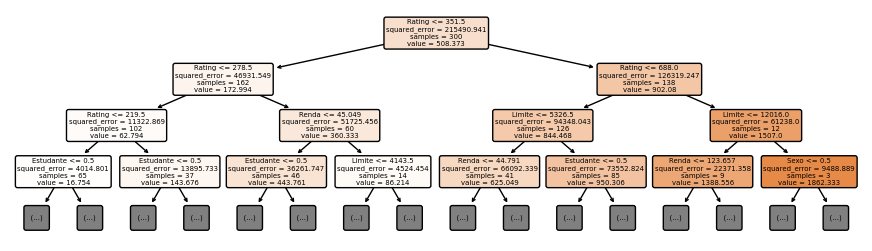

In [291]:
#Numero de folhas
print("Número de Folhas: ", modelo.get_n_leaves())

#Profundidade
print("Profundidade: ",modelo.get_depth())

#Obtem os parametros repassados. Nesse caso, por exemplo

 
#plotando a arvore de decisão com a função padrão do sklearn
plt.figure( figsize=(11,3),dpi=100)
plot_tree(modelo ,max_depth = 3 ,feature_names=['Renda', 'Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo',
       'Estudante', 'Casado', 'Etnia'],  
                      class_names=['Gasto Mensal'],
                      filled=True, rounded=True,fontsize=5.0  )
plt.show()

### Utilizando RandomForest

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
modelo = RandomForestRegressor()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

In [287]:
teste = {'Renda':40000 ,'Limite':2500,'Rating':750,'Cartoes':2,'Idade':20,'Educacao':17,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,40000,2500,750,2,20,17,1,1,0,1


[884.49]


### R^2 menor, eu tambem não sei porque

In [75]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 84.1392449157942


### Features do RandomForest são mais aprimoradas e a acurácia esta bem mais alta, o que pode ser ruim já que eu não tenho ideia se eu treinei o modelo do jeito certo.

In [76]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia: ", modelo.score(X, y))

Renda 0.07911781378169722
Limite 0.3031036226424092
Rating 0.5405728722510276
Cartoes 0.002809349926982953
Idade 0.008509509663369646
Educacao 0.005105947722505067
Sexo 0.0007465415152246551
Estudante 0.05643819648339793
Casado 0.0016207132643824102
Etnia 0.001975432749003252
Acurácia:  0.9859307185989685


### Usando XGBoost.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
modelo = XGBRegressor()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

In [78]:
resultado = modelo.predict(teste_df)
print(resultado)

[799.5243]


In [79]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 78.7833349922023


### Acurácia de quase 100%.

In [80]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia: ", modelo.score(X, y))

Renda 0.026520869
Limite 0.09002677
Rating 0.66081244
Cartoes 0.0019851765
Idade 0.002206139
Educacao 0.0015670513
Sexo 0.001480999
Estudante 0.21272369
Casado 0.001795675
Etnia 0.00088117406
Acurácia:  0.9926405812620638
